<h1 style="font-size:5rem; color:red">Sales Analysis</h1>

# Import the Necessary Libraries

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Merging 12 Months Data to Single File

In [12]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]

df_all = pd.DataFrame()
for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    df_all = pd.concat([df_all, df])
df_all.to_csv('all_sales.csv')

# Reading New csv File

In [13]:
all_df = pd.read_csv('all_sales.csv')
all_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<h2 style="font-size:4rem; color:red">What was the best month for sales? How much was earned that month?</h2>

## Removing NaN's

In [14]:
all_df = all_df[~all_df.isna().any(axis=1)]
all_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Removing 'Or' Data

In [15]:
all_df = all_df[all_df['Order Date'].str[0:2] != 'Or']
all_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Adding Month Column

In [16]:
all_df['Month'] = all_df['Order Date'].str[0:2]
all_df['Month'] = all_df['Month'].astype('int32')
all_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Converting Sales Column to Correct Type

In [17]:
all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered'])
all_df['Price Each'] = pd.to_numeric(all_df['Price Each'])

## Creating Sales Column

In [18]:
all_df['Sales'] = all_df['Quantity Ordered'] * all_df['Price Each']
all_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<h2 style="font-size:4rem; color:red">Best Month for Sales</h2>

range(1, 13)


C:\Users\araiz\AppData\Local\Temp\ipykernel_7676\1412178135.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_df.groupby('Month').sum()


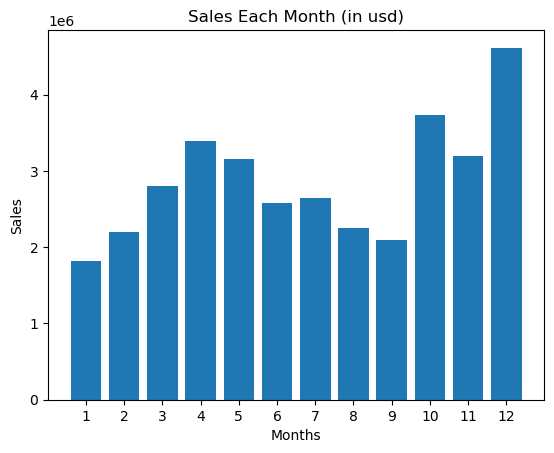

In [67]:
results = all_df.groupby('Month').sum()
months = range(1, 13)
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.title("Sales Each Month (in usd)")
plt.xlabel("Months")
plt.ylabel("Sales")

plt.show()

<h2 style="font-size:4rem; color:red">Which US city had the highest number of sales?</h2>

## Creating a City_df DataFrame for Ease

In [20]:
select = ['Quantity Ordered', 'Purchase Address', 'Sales']
city_df = all_df[select].copy()
city_df.head()

,Quantity Ordered,Purchase Address,Sales
0,2,"917 1st St, Dallas, TX 75001",23.90
2,1,"682 Chestnut St, Boston, MA 02215",99.99
3,1,"669 Spruce St, Los Angeles, CA 90001",600.00
4,1,"669 Spruce St, Los Angeles, CA 90001",11.99
5,1,"333 8th St, Los Angeles, CA 90001",11.99


## Creating a City_State column

In [23]:
city_df['City_State'] = city_df['Purchase Address'].str.split(',').str[1]
city_df.head()

,Quantity Ordered,Purchase Address,Sales,City_State
0,2,"917 1st St, Dallas, TX 75001",23.90,Dallas
2,1,"682 Chestnut St, Boston, MA 02215",99.99,Boston
3,1,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
4,1,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
5,1,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles


## Extracting State and Concat with City

In [24]:
city_df['City_State'] = city_df['City_State'] + ', ' + city_df['Purchase Address'].str.split(',').str[2]
city_df.head()

,Quantity Ordered,Purchase Address,Sales,City_State
0,2,"917 1st St, Dallas, TX 75001",23.90,"Dallas, TX 75001"
2,1,"682 Chestnut St, Boston, MA 02215",99.99,"Boston, MA 02215"
3,1,"669 Spruce St, Los Angeles, CA 90001",600.00,"Los Angeles, CA 90001"
4,1,"669 Spruce St, Los Angeles, CA 90001",11.99,"Los Angeles, CA 90001"
5,1,"333 8th St, Los Angeles, CA 90001",11.99,"Los Angeles, CA 90001"


<h2 style="font-size:4rem; color:red">Best City for Sales</h2>

<h2 style="font-size:3rem; color:blue">Qunatity Ordered per City</h2>

C:\Users\araiz\AppData\Local\Temp\ipykernel_7676\2736749038.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = city_df.groupby('City_State').sum()


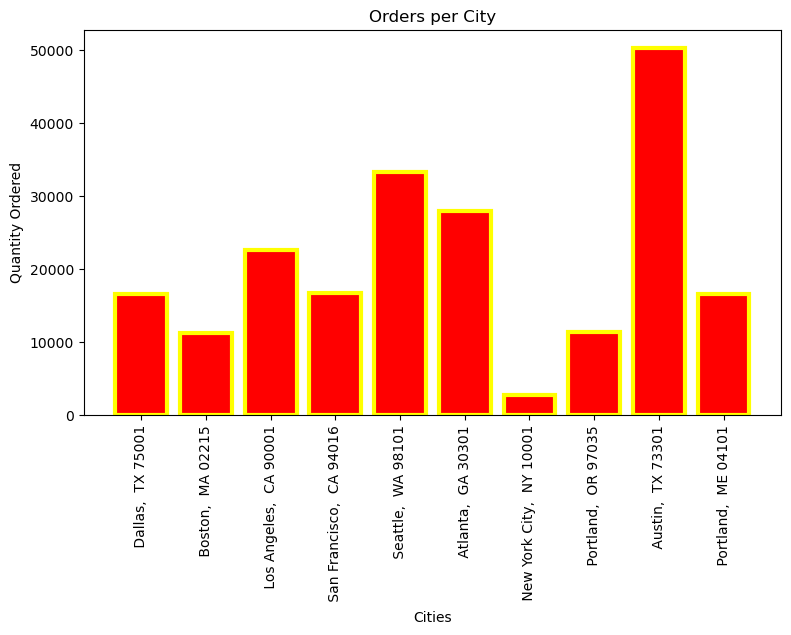

In [63]:
result = city_df.groupby('City_State').sum()
city_list = city_df['City_State'].unique().tolist()

plt.figure(figsize=(9, 5))

plt.bar(city_list, result['Quantity Ordered'], color="red", edgecolor='yellow', linewidth=3)
plt.title("Orders per City")
plt.xlabel("Cities")
plt.ylabel("Quantity Ordered")
plt.xticks(city_list, rotation='vertical')

plt.show()

<h2 style="font-size:3rem; color:blue">Sales per City</h2>

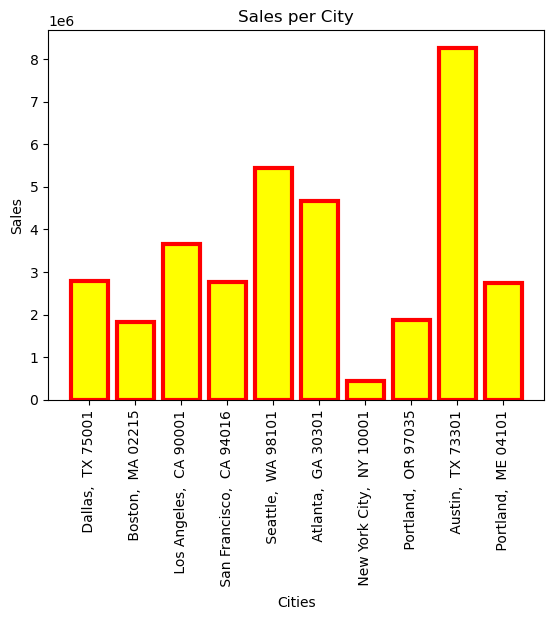

In [66]:
plt.bar(city_list, result['Sales'], color="yellow", edgecolor='red', linewidth=3)
plt.title("Sales per City")
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.xticks(city_list, rotation='vertical')


plt.show()